In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/June_8_data_metro_closest_stations.csv


In [2]:
data=pd.read_csv("/kaggle/input/June_8_data_metro_closest_stations.csv")

In [3]:
data.shape

(17890, 15)

In [4]:
data.head()

,Unnamed: 0,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17890 non-null  int64  
 1   size_sq_ft                17890 non-null  int64  
 2   propertyType              17890 non-null  object 
 3   bedrooms                  17890 non-null  int64  
 4   latitude                  17890 non-null  float64
 5   longitude                 17890 non-null  float64
 6   localityName              17890 non-null  object 
 7   suburbName                17890 non-null  object 
 8   cityName                  17890 non-null  object 
 9   price                     17890 non-null  int64  
 10  companyName               17890 non-null  object 
 11  closest_mtero_station_km  17890 non-null  float64
 12  AP_dist_km                17890 non-null  float64
 13  Aiims_dist_km             17890 non-null  float64
 14  NDRLW_

In [6]:
data.isna().sum()

Unnamed: 0                  0
size_sq_ft                  0
propertyType                0
bedrooms                    0
latitude                    0
longitude                   0
localityName                0
suburbName                  0
cityName                    0
price                       0
companyName                 0
closest_mtero_station_km    0
AP_dist_km                  0
Aiims_dist_km               0
NDRLW_dist_km               0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,size_sq_ft,bedrooms,latitude,longitude,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
count,17890.000000,17890.000000,17890.000000,17890.000000,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000,17890.000000
mean,8944.500000,1176.342091,2.168865,28.609382,77.168368,3.345196e+04,0.931495,13.727784,11.238134,11.421994
std,5164.542493,873.751044,0.971414,0.099547,0.097611,8.802054e+04,8.287856,11.357063,11.167202,11.063323
min,0.000000,100.000000,1.000000,19.185120,73.213829,1.200000e+03,0.000692,1.784779,0.634508,0.722023
25%,4472.250000,620.000000,1.000000,28.562540,77.103718,1.350000e+04,0.457782,11.018715,7.769267,7.986813
50%,8944.500000,900.000000,2.000000,28.611803,77.168755,2.200000e+04,0.698560,13.184035,10.515524,11.015571
75%,13416.750000,1600.000000,3.000000,28.651593,77.224998,3.500000e+04,1.087740,17.163502,15.514042,15.192483
max,17889.000000,16521.000000,15.000000,28.872597,80.358467,5.885646e+06,1096.479453,1109.894053,1115.621439,1123.778457


In [8]:
data['suburbName'].unique()

array(['Delhi East', 'Rohini', 'Delhi South', 'West Delhi', 'North Delhi',
       'Dwarka', 'Delhi Central', 'Other', 'South West Delhi',
       'Delhi North', 'North West Delhi', 'Delhi West'], dtype=object)

In [9]:
data['suburbName'].replace('Rohini','North West Delhi', inplace=True)
data['suburbName'].replace('Dwarka','South West Delhi', inplace=True)
data['suburbName'].replace('Delhi North','North Delhi',inplace=True)
data['suburbName'].replace('Delhi West','West Delhi',inplace=True)
data['suburbName'].replace('Delhi South','South Delhi',inplace=True)
data['suburbName'].replace('Delhi East','East Delhi',inplace=True)

/tmp/ipykernel_18/3008881977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['suburbName'].replace('Rohini','North West Delhi', inplace=True)
/tmp/ipykernel_18/3008881977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [10]:
data['suburbName'].unique()

array(['East Delhi', 'North West Delhi', 'South Delhi', 'West Delhi',
       'North Delhi', 'South West Delhi', 'Delhi Central', 'Other'],
      dtype=object)

[Text(0, 0, '3749'),
 Text(0, 0, '2732'),
 Text(0, 0, '2706'),
 Text(0, 0, '2536'),
 Text(0, 0, '2521'),
 Text(0, 0, '1933'),
 Text(0, 0, '1428'),
 Text(0, 0, '285')]

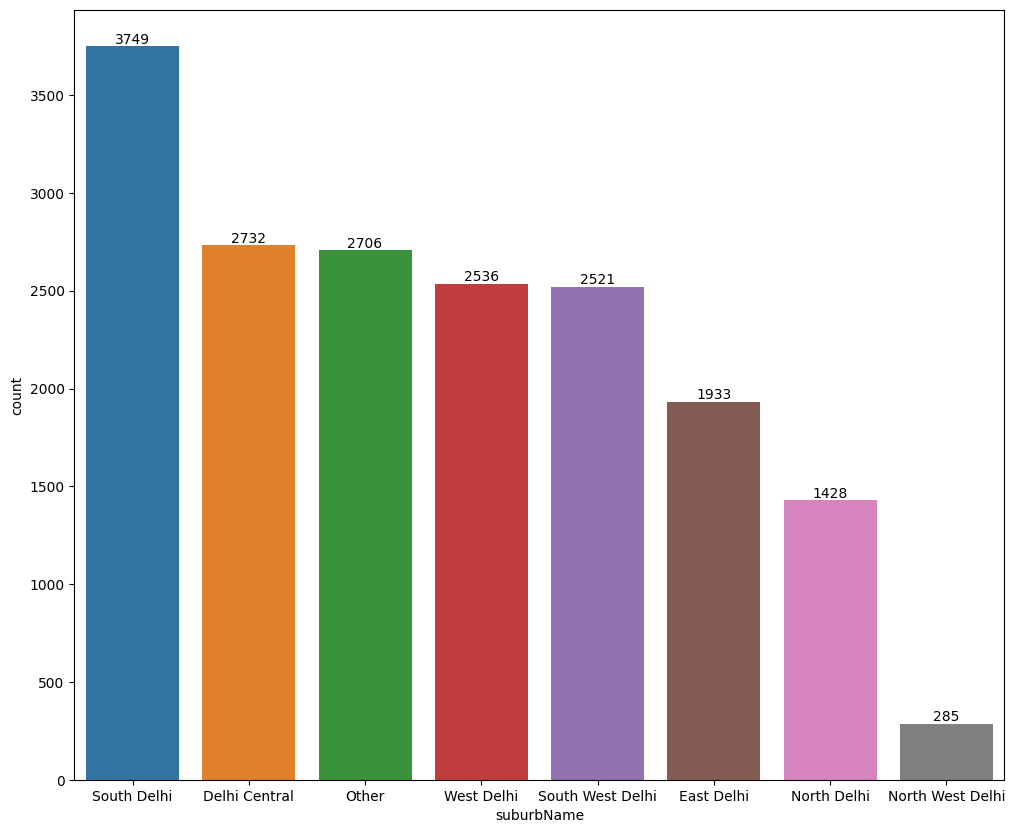

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
ax = sns.countplot(x=data['suburbName'],
                   order=data['suburbName'].value_counts(ascending=False).index);

abs_values = data['suburbName'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)


In [12]:
data=data.drop('Unnamed: 0', axis=1)
data.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,East Delhi,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,East Delhi,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,East Delhi,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,East Delhi,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,East Delhi,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [13]:
df1=data[['size_sq_ft','bedrooms','price', 'closest_mtero_station_km' , 'AP_dist_km','Aiims_dist_km' , 'NDRLW_dist_km']]
df1.head()         

,size_sq_ft,bedrooms,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,1,9000,0.577495,21.741188,11.119239,6.227231
1,1050,2,20000,0.417142,21.401856,9.419061,9.217502
2,2250,2,28000,0.125136,22.620365,11.829486,7.159184
3,1350,2,28000,0.371709,22.681201,11.982708,7.097348
4,450,2,12500,1.087760,22.592810,10.571573,10.263271


<Axes: >

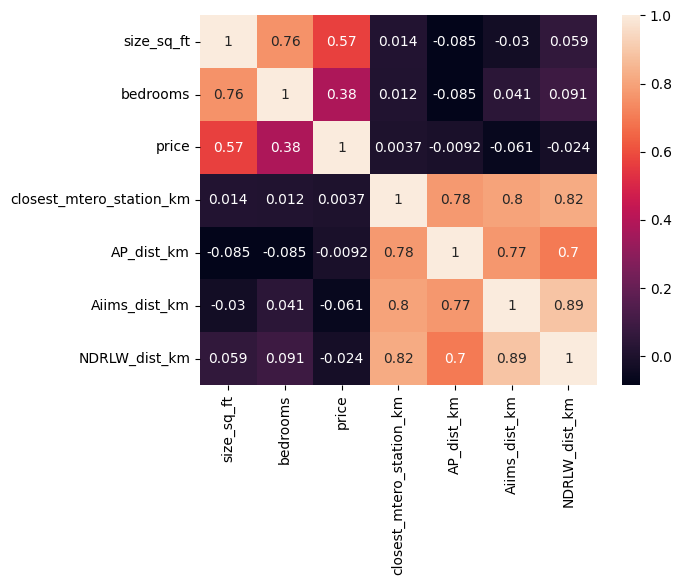

In [14]:
sns.heatmap(df1.corr(),annot=True )

In [15]:
data=data.drop(['latitude','longitude','suburbName','cityName','companyName', 'AP_dist_km','Aiims_dist_km' , 'NDRLW_dist_km'], axis=1)
data.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709
4,450,Apartment,2,New Ashok Nagar,12500,1.087760


In [16]:
data['price_per_sqft']=data['price']/data['size_sq_ft']
data['price_per_sqft']=data['price_per_sqft'].round(2)
data.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,price_per_sqft
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495,22.50
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142,19.05
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136,12.44
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709,20.74
4,450,Apartment,2,New Ashok Nagar,12500,1.087760,27.78


In [17]:
locality_count = data['localityName'].value_counts()
locality_count

localityName
Patel Nagar              1448
Paschim Vihar             949
Chattarpur                826
Pitampura                 609
mayur vihar phase 1       523
                         ... 
Sector-D Vasant Kunj        1
Pocket 7 Sector D           1
Shanti Kunj Main Road       1
Pocket 9 Sector B           1
Jhandewalan                 1
Name: count, Length: 781, dtype: int64

In [18]:
len(locality_count[locality_count<=5])

522

In [19]:
locality_count_less_than_5 = locality_count[locality_count<=5]
locality_count_less_than_5

localityName
Shiksha Bharti School Road    5
Pitampura near NSP            5
Hastsal                       5
Bahapur                       5
Mahipalpur Extention          5
                             ..
Sector-D Vasant Kunj          1
Pocket 7 Sector D             1
Shanti Kunj Main Road         1
Pocket 9 Sector B             1
Jhandewalan                   1
Name: count, Length: 522, dtype: int64

In [20]:
data['localityName'] = data['localityName'].apply(lambda x: 'other' if x in locality_count_less_than_5 else x)
data['localityName'].value_counts()

localityName
Patel Nagar                  1448
other                         980
Paschim Vihar                 949
Chattarpur                    826
Pitampura                     609
                             ... 
A 2 Block                       6
Sector 24 Rohini                6
Mandawali                       6
Pitampura KP Block              6
Block AP Poorvi Pitampura       6
Name: count, Length: 260, dtype: int64

In [21]:
locality_dummy = pd.get_dummies(data.localityName, dtype=int)
locality_dummy.head()

,72 Sector 23 Road,944 B Block Road,A 2 Block,A1 Block Paschim Vihar Delhi,A4 Block Paschim Vihar,AGCR Enclave,Abul Fazal Enclave Jamia Nagar,Adchini,Alaknanda,Amar colony,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
property_dummy = pd.get_dummies(data.propertyType, dtype=int)
property_dummy.head()

,Apartment,Independent Floor,Independent House,Villa
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [23]:
df2 = pd.concat([data,property_dummy,locality_dummy], axis='columns')
df2.head()

,size_sq_ft,propertyType,bedrooms,localityName,price,closest_mtero_station_km,price_per_sqft,Apartment,Independent Floor,Independent House,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,400,Independent Floor,1,Swasthya Vihar,9000,0.577495,22.50,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1050,Apartment,2,mayur vihar phase 1,20000,0.417142,19.05,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2250,Independent Floor,2,Swasthya Vihar,28000,0.125136,12.44,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1350,Independent Floor,2,Krishna Nagar,28000,0.371709,20.74,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,450,Apartment,2,New Ashok Nagar,12500,1.087760,27.78,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df3 = df2.drop(['localityName','propertyType'],  axis='columns')
df3.head()

,size_sq_ft,bedrooms,price,closest_mtero_station_km,price_per_sqft,Apartment,Independent Floor,Independent House,Villa,72 Sector 23 Road,...,dwarka sector 17,greater kailash Enclave 1,i p extension patparganj,laxmi nagar,laxmi nagar near metro station,mayur vihar phase 1,nawada,other,rohini sector 5,vikaspuri
0,400,1,9000,0.577495,22.50,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050,2,20000,0.417142,19.05,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2250,2,28000,0.125136,12.44,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1350,2,28000,0.371709,20.74,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450,2,12500,1.087760,27.78,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x=df3.drop(['price'], axis=1)
y=df3['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=10,train_size=0.2)

In [27]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(x_train, y_train)

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.4557602750533247

In [29]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv_lin = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(),x,y,cv=cv_lin) #ShuffleSplit

array([0.58499202, 0.54312944, 0.54084859, 0.54452869, 0.57048991,
       0.66613998, 0.65204283, 0.52638397, 0.57988688, 0.65233054])

In [30]:
lin_predict = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(lin_predict,y_test))
lin_rmse

70430.64714178586

In [31]:
np.sqrt(-cross_val_score(LinearRegression(),x,y,cv=cv_lin,scoring='neg_mean_squared_error'))

array([47278.3929348 , 52688.07533031, 45159.35626434, 93551.00869909,
       54983.03969534, 42671.64069358, 58586.21514476, 87829.90710919,
       39194.99873057, 57088.71744649])

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=10)
forest_reg.fit(X_train,y_train)
forest_reg.score(X_test,y_test)

0.5337469039951787

In [33]:
cv_forest = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)

cross_val_score(RandomForestRegressor(),x,y,cv=cv_forest)

array([0.88259249, 0.89289256, 0.94326681, 0.81521045, 0.98822496,
       0.68981974, 0.81415833, 0.80874967, 0.96353584, 0.74701061])

In [34]:
cross_val_score(RandomForestRegressor(),x,y,cv=cv_forest).mean()

0.8553447529452118

In [35]:
cv_forest_mean = np.mean(cross_val_score(RandomForestRegressor(),x,y,cv=cv_forest))
print('Mean Score:', cv_forest_mean)

Mean Score: 0.8469231269166435


In [36]:
forest_predict = forest_reg.predict(X_test)

forest_rmse = np.sqrt(mean_squared_error(forest_predict,y_test))
forest_rmse

65189.46606186079

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=10)
tree_reg.fit(X_train,y_train)
tree_reg.score(X_test,y_test)

0.6039937193617786

In [38]:
cv_tree = ShuffleSplit(n_splits=10, test_size=0.2, random_state=10)

cross_val_score(DecisionTreeRegressor(),x,y,cv=cv_tree)

array([0.98224864, 0.88459358, 0.64460959, 0.87452995, 0.84867548,
       0.94306739, 0.87741435, 0.67044645, 0.92244609, 0.87433105])

In [39]:
tree_predict = tree_reg.predict(X_test)

tree_rmse = np.sqrt(mean_squared_error(tree_predict,y_test))
tree_rmse

60078.29465570259